#### Accuracy vs. Temp (and spread) for three categories of variables 

In [1]:
import os
import numpy as np
import pandas as pd
import glob
import json
import matplotlib.pyplot as plt
import matplotlib
import time

In [2]:
plt.rcParams.update({
    "text.usetex": True
})

### For each spread, three different categories in one plot 

In [3]:
### define features, legends and labels 
legend_label = {"g":"G", 
                "ab": r"$\mathrm{A}^*$", 
                "topo": r"$\mathrm{N}^*$", 
                "g_ab": "G + Abundance", 
                "g_topo": "G + Topology", 
                'topo_ab':"Topology + Abundance", 
                'g_topo_ab': "G + Topology + Abundance",
                'degree': r'$\langle k \rangle$', 
                'cc': r'$\langle C \rangle$',
                'spl': r'$\langle \ell \rangle$' , 
                'neighbor': r'$\langle k_{nn} \rangle$',
                'betw': r'$\langle g(v) \rangle$', 
                'edgebetw': r'$\langle g(e) \rangle$',
                'g_degree': "G + %s"%r'$\langle k \rangle$',
                'g_cc': "G + %s"%r'$\langle C \rangle$', 
                'g_spl': "G + %s"%r'$\langle \ell \rangle$', 
                'g_neighbor': "G + %s"%r'$\langle k_{nn} \rangle$', 
                'g_betw': "G + %s"%r'$\langle g(v) \rangle$', 
                'g_edgebetw': "G + %s"%r'$\langle g(e) \rangle$', 
                "CH4": r"$\mathrm{CH}_4$", 
                "CO": r"$\mathrm{CO}$", 
                "H2O": r"$\mathrm{H_2O}$", 
                "NH3": r"$\mathrm{NH}_3$",
                'g_CO': "G + %s"%r"$\mathrm{CO}$", 
                'g_CH4': "G + %s"%r"$\mathrm{CH}_4$",
                'g_NH3': "G + %s"%r"$\mathrm{NH}_3$",
                'g_H2O': "G + %s"%r"$\mathrm{H_2O}$", 
                'CO_NH3': "%s + %s"%(r"$\mathrm{CO}$", r"$\mathrm{NH}_3$"),
                'g_CO_NH3': "G + %s + %s"%(r"$\mathrm{CO}$", r"$\mathrm{NH}_3$"),
                'spl_neighbor_betw_edgebetw': "%s + %s + %s + %s"%(r'$\langle \ell \rangle$', r'$\langle k_{nn} \rangle$', 
                                                                   r'$\langle g(v) \rangle$', r'$\langle g(e) \rangle$'), 
                'g_spl_neighbor_betw_edgebetw': "G + %s + %s + %s + %s"%(r'$\langle \ell \rangle$', r'$\langle k_{nn} \rangle$', 
                                                                   r'$\langle g(v) \rangle$', r'$\langle g(e) \rangle$'),
                'top_predictor': "G + %s + %s + %s + %s + %s + %s"%(r"$\mathrm{CO}$", r"$\mathrm{NH}_3$", 
                                                                    r'$\langle \ell \rangle$', r'$\langle k_{nn} \rangle$', 
                                                            r'$\langle g(v) \rangle$', r'$\langle g(e) \rangle$'),
                'top': r"$\mathrm{T}^*$" 
                }

individual_group = ['g', 'topo', 'ab']
group_combination = ['topo_ab', 'g_topo', 'g_ab']
three_group = ['g_topo_ab']
simple_topo = ['degree', 'cc']
complex_topo = ['spl', 'neighbor']
betweenness = ['betw', 'edgebetw']
g_individual_topology = ['g_degree','g_cc', 'g_spl', 'g_neighbor', 'g_betw', 'g_edgebetw']
individual_abundance = ["CH4", "CO", "H2O", "NH3"]
g_individual_abundance = ['g_CO', 'g_CH4','g_NH3','g_H2O']
individual_topology = simple_topo + complex_topo + betweenness
individual_features = ['g'] + individual_abundance + individual_topology
best_predictors = ['CO_NH3', 'spl_neighbor_betw_edgebetw','g_CO_NH3', 'g_spl_neighbor_betw_edgebetw','top_predictor']


In [4]:
###
original_data_dir = "/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/"
perturbed_data_dir = "/Users/hkim78/work/HotJupiter/ML/results/perturbed_data/2021/"
dir_plot = "/Users/hkim78/work/HotJupiter/plot/atmosphere-uncertainty/perturbed_data/2021/"

mean_temp = np.arange(400, 2100, 100)

### Main Figure

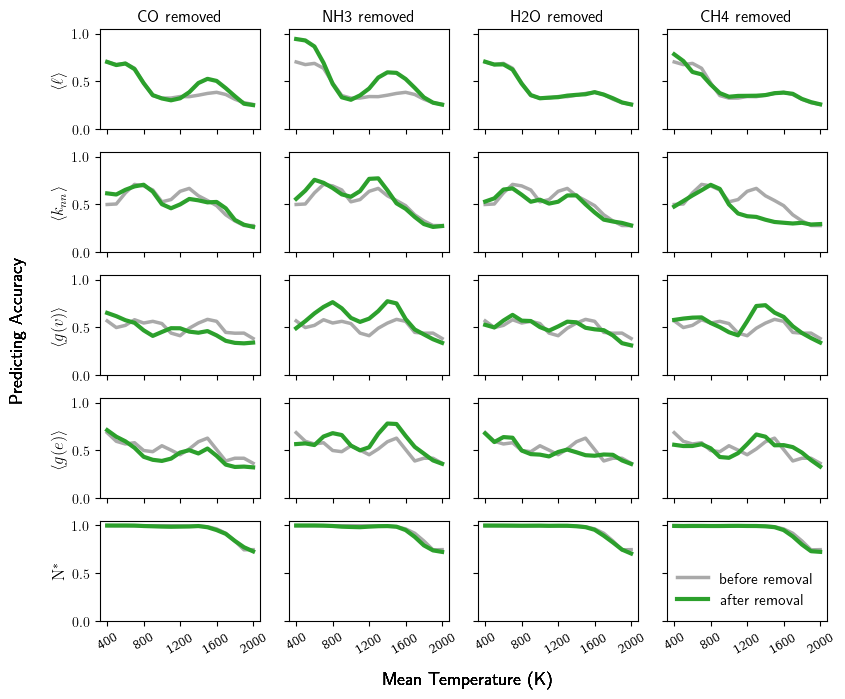

In [5]:
# Main Figure
fig, ax = plt.subplots(5, 4, sharex = True, sharey = True, figsize = (8.5, 7))
spread = "50"
i = 0
for feature_group in complex_topo + betweenness + ['topo']:
    j = 0
    
    original_input_path = original_data_dir + "accuracy_%s.json"%feature_group
    with open(original_input_path) as infile:
        a = json.load(infile)
    
    for removed_species in ["CO", "NH3", "H2O", "CH4"]:
   
        perturbed_input_path = perturbed_data_dir + "perturbation_accuracy_%s.json"%feature_group
 
        with open(perturbed_input_path) as infile2:
            b = json.load(infile2)

        ax[i, j].plot(a[spread], label = "before removal", linewidth=2.5, color = 'darkgrey')
        ax[i, j].plot(b[removed_species], label = "after removal", linewidth=3, color='C2')
        ax[i, j].set_xticks(np.arange(0, 17, 4))
        ax[i, j].set_xticklabels(np.arange(400, 2100, 400), fontsize=10, rotation=30)
        ax[i, j].yaxis.set_tick_params(labelsize=10)        
        
        # setting for axis  
        plt.ylim([0.0,1.05])
        if i == 0:
            ax[i, j].set_title("%s removed"%removed_species)
        if j == 0:
            ax[i, j].set_ylabel("\n\n%s"%legend_label[feature_group], rotation=90, fontsize=12)
        if i == 4 and j ==3:
            leg = ax[i, j].legend(loc='lower right', frameon=False, fontsize=11)
        if i == 4:
            ax[i, j].set_xlabel("xlabel", color="white",fontsize=15)
                
        j += 1
    i += 1
        
    ### Set common yaxis label        
    fig.text(0.02,0.52, "Predicting Accuracy", ha="center", va="center", fontweight = "ultralight", rotation=90, fontsize=13)
    ### Set common xaxis label
    fig.text(0.55, 0.02, 'Mean Temperature (K)', ha='center', va="center", fontsize=13)
    
plt.tight_layout(w_pad = 0.5)

plt.savefig(dir_plot + "/png-files/subplot_perturbed_data.png", dpi=200)
plt.savefig(dir_plot + "/pdf-files/subplot_perturbed_data.pdf")
plt.show()

### Supp Figure

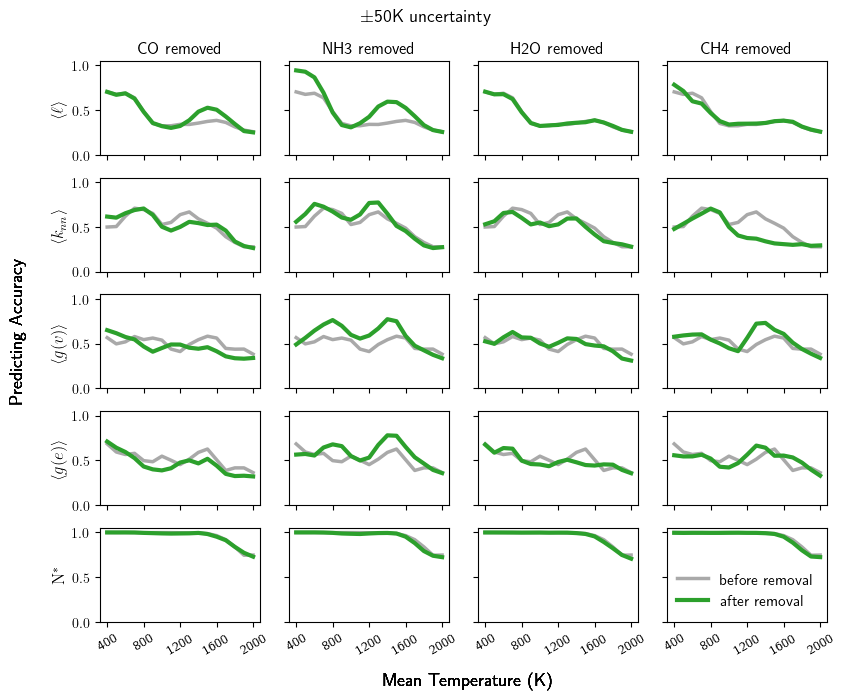

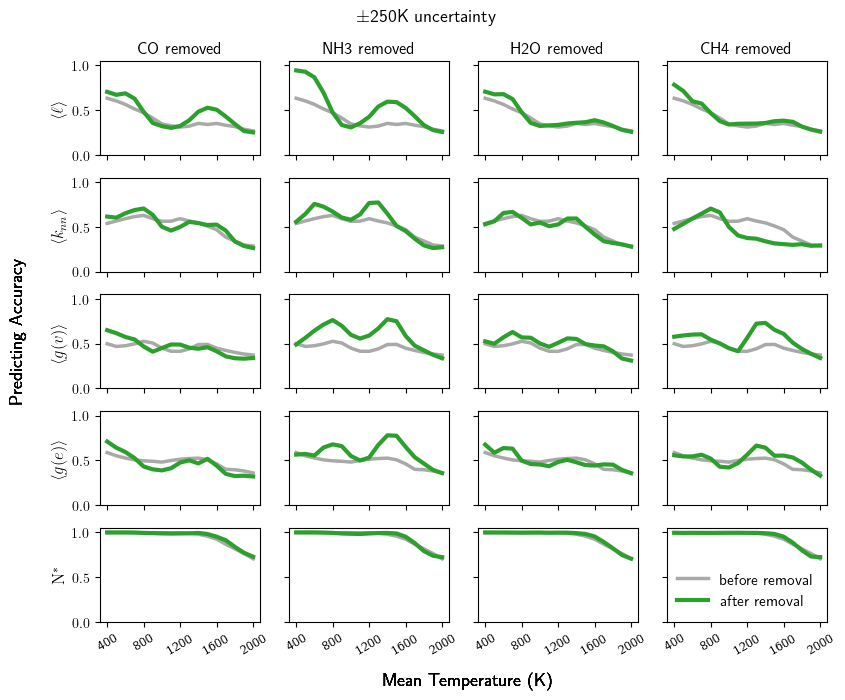

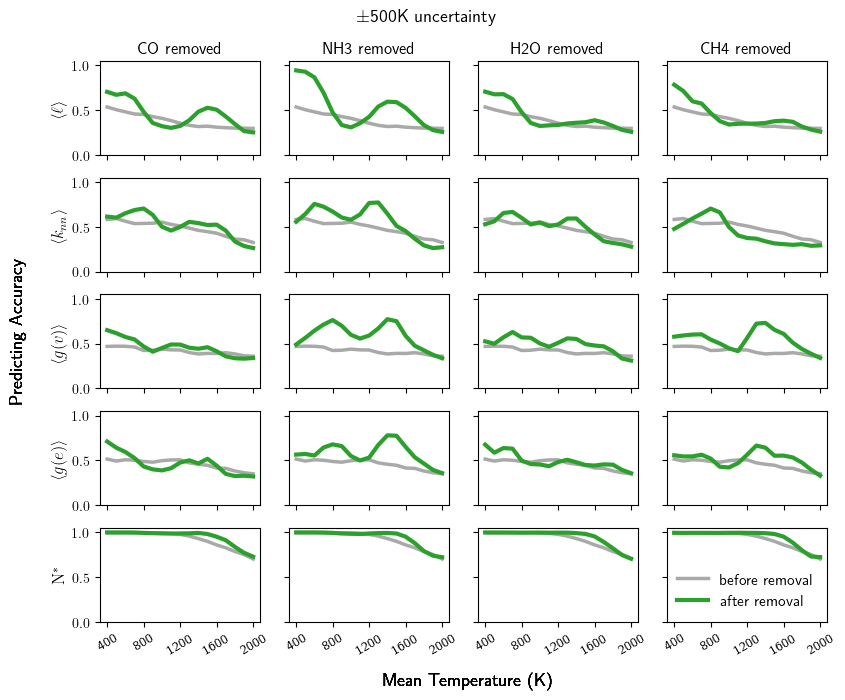

In [6]:
# Supp Figure

for spread in ["50", "250", "500"]:
    fig, ax = plt.subplots(5, 4, sharex = True, sharey = True, figsize = (8.5, 7))
    i = 0
    for feature_group in complex_topo + betweenness + ['topo']:
        j = 0
        
        original_input_path = original_data_dir + "accuracy_%s.json"%feature_group
        with open(original_input_path) as infile:
            a = json.load(infile)
        
        for removed_species in ["CO", "NH3", "H2O", "CH4"]:
       
            if spread == "50":
                perturbed_input_path = perturbed_data_dir + \
                                   "perturbation_accuracy_%s.json"%feature_group
            else:
                perturbed_input_path = perturbed_data_dir + \
                                   "perturbation_accuracy_spread%s_%s.json"%(spread, feature_group)
     
            with open(perturbed_input_path) as infile2:
                b = json.load(infile2)
    
            ax[i, j].plot(a[spread], label = "before removal", linewidth=2.5, color = 'darkgrey')
            ax[i, j].plot(b[removed_species], label = "after removal", linewidth=3, color='C2')
            ax[i, j].set_xticks(np.arange(0, 17, 4))
            ax[i, j].set_xticklabels(np.arange(400, 2100, 400), fontsize=10, rotation=30)
            ax[i, j].yaxis.set_tick_params(labelsize=10)        
            
            # setting for axis  
            plt.ylim([0.0,1.05])
            if i == 0:
                ax[i, j].set_title("%s removed"%removed_species)
            if j == 0:
                ax[i, j].set_ylabel("\n\n%s"%legend_label[feature_group], rotation=90, fontsize=12)
            if i == 4 and j ==3:
                leg = ax[i, j].legend(loc='lower right', frameon=False, fontsize=11)
            if i == 4:
                ax[i, j].set_xlabel("xlabel", color="white",fontsize=15)
                    
            j += 1
        i += 1
        
        
        ### Set common yaxis label        
        fig.text(0.02,0.52, "Predicting Accuracy", ha="center", va="center", fontweight = "ultralight", rotation=90, fontsize=13)
        ### Set common xaxis label
        fig.text(0.55, 0.02, 'Mean Temperature (K)', ha='center', va="center", fontsize=13)
    
    plt.suptitle(r"$\pm$%sK uncertainty"%spread, fontsize=13)    
    plt.tight_layout(w_pad = 0.5)
    
    plt.savefig(dir_plot + "/png-files/supp_subplot_%s_perturbed_data.png"%spread, dpi=300)
    plt.savefig(dir_plot + "/pdf-files/supp_subplot_%s_perturbed_data.pdf"%spread)
    plt.show()